In [1]:
from loadData import loadData
from initAnalysis import initAnalysis
import pandas as pd 
from matplotlib import pyplot as plt
import numpy  as np

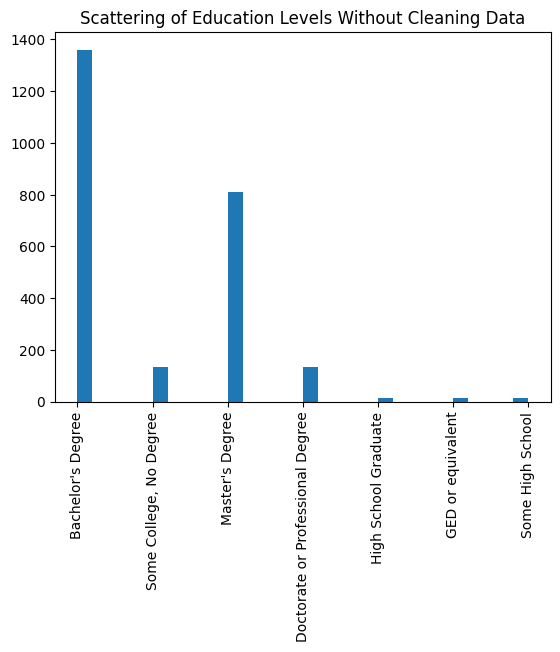

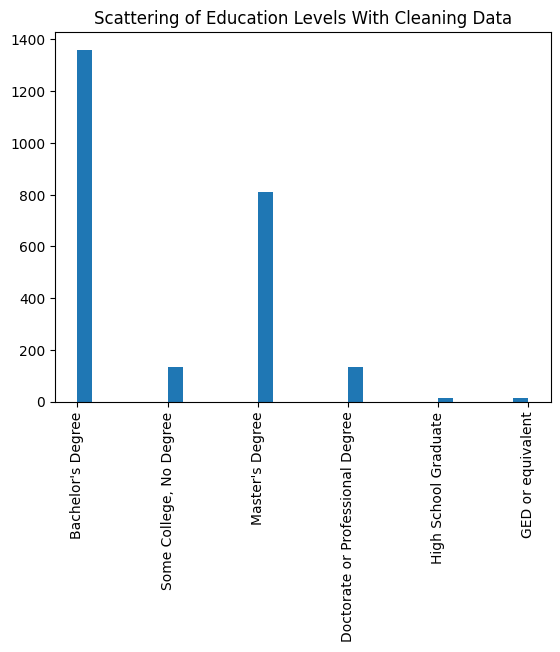

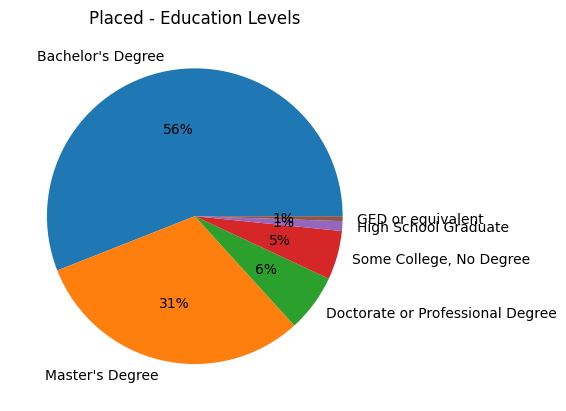

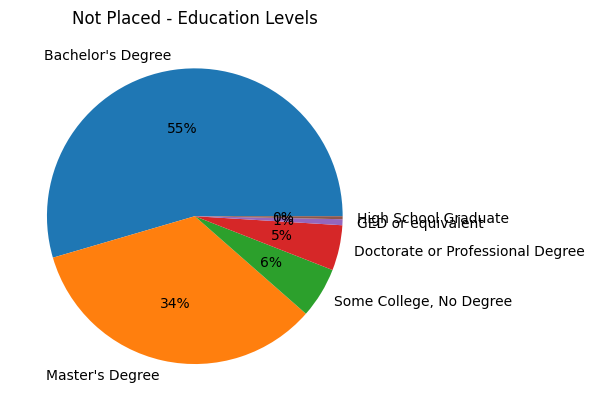

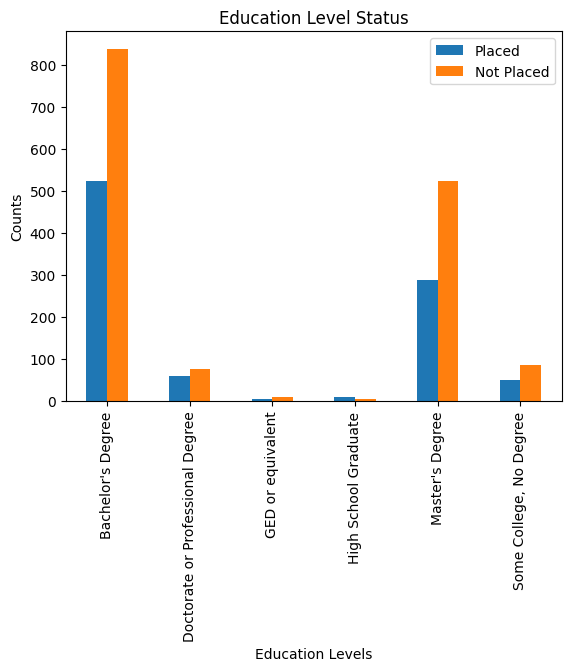

In [2]:
"""
Load data into DataFrame, clean and analyze education levels of placed 
and not placed candidates.

Steps:
1. Load data into DataFrame using loadData() function.
2. Prepare Data:
   - Cleaning Data:
     - Drop rows with missing values in 'highest_level_of_education'.
     - Plot histogram to visualize education levels distribution without cleaning the data using matplotlib:
       - Title: 'Scattering of Education Levels Without Cleaning Data'
   - Replace 'Some High School' with NaN in 'highest_level_of_education' column.
     Drop corresponding rows with missing values in 'highest_level_of_education'.
     Plot histogram again to visualize education levels distribution after cleaning the data using matplotlib:
       - Title: 'Scattering of Education Levels With Cleaning Data'
3. End Prepare Data
   - End Cleaning Data

4. Initialize analysis using initAnalysis() function to get targetPlaced, 
   dataPlaced, targetNotPlaced, and dataNotPlaced.
5. Extract 'highest_level_of_education' for placed and not placed candidates.
6. Count occurrences of each education level for placed and not placed candidates.
7. Plot pie charts for education levels distribution using matplotlib:
   - For placed candidates: educationLevelPlaced.plot(kind='pie', autopct='%1.0f%%').
     Set title to 'Placed - Education Levels'.
   - For not placed candidates: educationLevelNotPlaced.plot(kind='pie', autopct='%1.0f%%').
     Set title to 'Not Placed - Education Levels'.
8. Create a combined DataFrame 'combinedDataFrame' showing counts of education levels 
   for both placed and not placed candidates.
9. Plot a bar chart using combinedDataFrame.plot(kind='bar') to visualize the counts 
   of education levels for both groups using matplotlib:
   - X-axis: 'Education Levels'
   - Y-axis: 'Counts'
   - Title: 'Education Level Status'

Note: Requires matplotlib and pandas libraries to be imported.
"""

# Load data into DataFrame
dataFrame = loadData()

# Prepare Data
# Cleaning Data

# Drop rows with missing values in "highest_level_of_education"
dataFrame = dataFrame.dropna(subset=["highest_level_of_education"])
# Plot histogram to visualize education levels distribution without cleaning the data
plt.title('Scattering of Education Levels Without Cleaning Data')
plt.hist(dataFrame["highest_level_of_education"], bins=30)
plt.xticks(rotation=90)
plt.show()

# Replace "Some High School" with NaN and drop corresponding rows
dataFrame["highest_level_of_education"] = dataFrame["highest_level_of_education"].replace("Some High School", np.nan)
dataFrame = dataFrame.dropna(subset=["highest_level_of_education"])
# Plot histogram to visualize education levels distribution after cleaning the data
plt.title('Scattering of Education Levels With Cleaning Data')
plt.hist(dataFrame["highest_level_of_education"], bins=30)
plt.xticks(rotation=90)
plt.show()

# End Prepare Data
# End Cleaning Data

# Initialize analysis
targetPlaced, dataPlaced, targetNotPlaced, dataNotPlaced = initAnalysis(dataFrame)

# Extract education levels for placed and not placed groups
educationLevelPlaced = dataPlaced["highest_level_of_education"]
educationLevelNotPlaced = dataNotPlaced["highest_level_of_education"]

# Count occurrences of each education level
educationLevelPlaced = educationLevelPlaced.dropna().value_counts()
educationLevelNotPlaced = educationLevelNotPlaced.dropna().value_counts()

# Plot pie chart for education levels of placed candidates
educationLevelPlaced.plot(kind='pie', autopct='%1.0f%%')
plt.ylabel('')
plt.title('Placed - Education Levels')
plt.xticks(rotation=90)
plt.show()

# Plot pie chart for education levels of not placed candidates
educationLevelNotPlaced.plot(kind='pie', autopct='%1.0f%%')
plt.title('Not Placed - Education Levels')
plt.ylabel('')
plt.xticks(rotation=90)
plt.show()

# Create a combined DataFrame for bar chart visualization
combinedDataFrame = pd.DataFrame({
    'Placed': educationLevelPlaced,
    'Not Placed': educationLevelNotPlaced
})

# Plot bar chart showing counts of education levels for both groups
combinedDataFrame.plot(kind='bar')
plt.xlabel('Education Levels')
plt.ylabel('Counts')
plt.title('Education Level Status')
plt.show()
